# <center>**PROYECTO 9**</center>

## Preparación de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
print(df.shape)
print('\n')
df.info()
print('\n')
print(df.head(5))

(10000, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0   

In [3]:
print(df['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


### Comentarios

En la información anterior, obtuvimos que en la columna 'Tenure' existen valores 'nan' y debido a la naturaleza de los datos no podemos rellenarlos con medias ni con medianas ya que serían datos incorrectos y podrían guiar a nuestro algoritmo en otra dirección, así que se llenaran con '0' para que al entrenar los datos no existan errores de lectura. 

In [4]:
df['Tenure'].fillna(0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class=“tocSkip”></a>
La verificación de valores ausentes te ayuda a comprender mejor tus datos y tomar decisiones informadas sobre cómo imputarlos. Recuerda siempre calcular el porcentaje de valores ausentes, ya que esto te dará una idea clara de su impacto en tu conjunto de datos. Sigue adelante con tu excelente trabajo y continúa explorando técnicas para mejorar tus análisis.
</div>

### Asignación de datos de entrenamiento y validación

In [6]:
# Aplicación de OHE a df
data = pd.get_dummies(df, drop_first=True)

# Asignación de características y objetivos al dataset original para su división.
features_OHE = data.drop(['Exited'], axis=1)
target_OHE = data['Exited']

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y validación
train_features_OHE, valid_features_OHE, train_target_OHE, valid_target_OHE = train_test_split(
    features_OHE, target_OHE, test_size=0.25, random_state=98765)

## Revisión de equilibrio de clases

A continuación se realiza el conteo de ceros y unos en el objetivo de nuestro modelo.

La fracción de ceros en la columna 'Exited' es de: 0.80
La fracción de unos en la columna 'Exited' es de: 0.20


<AxesSubplot:>

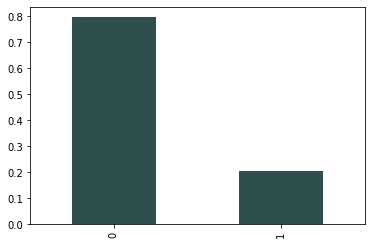

In [7]:
class_frequency = df['Exited'].value_counts(normalize=True)
print(f"La fracción de ceros en la columna 'Exited' es de: {
      class_frequency[0]:.2f}\nLa fracción de unos en la columna 'Exited' es de: {class_frequency[1]:.2f}")
class_frequency.plot(kind='bar', color='darkslategray')

### Entrenamiento de modelo
Sin tomar en cuenta el desequilibrio de clases. A continuación se presenta el entrenamiento del modelo con árbol de decisiones.

In [8]:
model = DecisionTreeClassifier(random_state=98765)
model.fit(train_features_OHE, train_target_OHE)
predicted_valid_OHE = model.predict(valid_features_OHE)

accuracy_valid_OHE = accuracy_score(valid_target_OHE, predicted_valid_OHE)
print('la exactitud de predicción del modelo de validación es de:', accuracy_valid_OHE)

la exactitud de predicción del modelo de validación es de: 0.8224


In [9]:
matrix = confusion_matrix(valid_target_OHE, predicted_valid_OHE)
recall = recall_score(valid_target_OHE, predicted_valid_OHE)
precision = precision_score(valid_target_OHE, predicted_valid_OHE)
F1 = f1_score(valid_target_OHE, predicted_valid_OHE)


print(f'Matriz de confusión:\n{matrix}\n')
print(f'Recall:{recall: .2f}')
print(f'Precisión:{precision: .2f}')
print(f'F1:{F1: .2f}')

Matriz de confusión:
[[1792  200]
 [ 244  264]]

Recall: 0.52
Precisión: 0.57
F1: 0.54


### Observaciones:

La predicción del modelo tienen un porcentaje alto de exactitud del 82%. 
Éste valor no significa que sea un buen modelo ya que al momento de revisar el balance de clase nos da un resultado de 80-20; 80% de ceros y 20% de unos. 
Siendo el uno el valor que queremos identificar ya que nos indica los clientes que abandonaron el banco. El siguiente paso fue identificar que tan bueno es el modelo para identificar el uno: 
- Tiene un recall de 0.52, un valor no muy bueno para identificar los verdaderos positivos, ya que esta muy alejado del uno. 
- Tiene una precision de 0.57, muy parecido al del recall lo que significa que, el reconocimiento de negativos y positivos esta a medio camino de ser preciso.  
- con un valor F1 de 0.54 nos indica que el modelo tiene un equilibrio razonable entre la precisión y la sensibilidad. El modelo es capaz de clasificar correctamente un porcentaje considerable de instancias tanto de la clase positiva como de la clase negativa, aunque lejos de ser ideal.

Para poder aumentar los valores, será necesario balancear las clases y tocar algunas características para llegar al valor deseado. 

## Mejorar la calidad del modelo

### Técnicas para tratar el desequilibrio de clases

Los modelos con los que se trabajará serán: LogisticRegression y DecisionTreeClassifier por lo que el siguiente paso se estandarizarán las características ya que las columnas númericas tienen la misma importancia independientemente de su valor.

In [10]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()

train_features_OHE[numeric] = scaler.fit_transform(train_features_OHE[numeric])
valid_features_OHE[numeric] = scaler.transform(valid_features_OHE[numeric])

/tmp/ipykernel_454/1426126178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features_OHE[numeric] = scaler.fit_transform(train_features_OHE[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_454/1426126178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

### Uso de sobremuestreo en regresión linear

In [11]:
features_zeros = train_features_OHE[train_target_OHE == 0]
features_ones = train_features_OHE[train_target_OHE == 1]
target_zeros = train_target_OHE[train_target_OHE == 0]
target_ones = train_target_OHE[train_target_OHE == 1]

features_upsampled = pd.concat([features_zeros] + [features_ones] * 6)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 6)

features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=98765)

model_R = LogisticRegression(solver='liblinear', random_state=98765)
model_R.fit(features_upsampled, target_upsampled)
predicted_valid_R = model_R.predict(valid_features_OHE)

f1 = f1_score(valid_target_OHE, predicted_valid_R)

print(f'F1: {f1:.2f}')

# Valor AUC-ROC

probabilities_valid_R = model_R.predict_proba(valid_features_OHE)
probabilities_one_valid_R = probabilities_valid_R[:, 1]
auc_roc = roc_auc_score(valid_target_OHE, probabilities_one_valid_R)

print(f'AUC_ROC: {auc_roc:.2f}')

F1: 0.34
AUC_ROC: 0.51


### Uso de sobremuestreo en árbol de decisiones

In [12]:
model_L = DecisionTreeClassifier(random_state=98765)
model_L.fit(features_upsampled, target_upsampled)
predicted_valid_L = model_L.predict(valid_features_OHE)

f1 = f1_score(valid_target_OHE, predicted_valid_L)

print(f'F1: {f1:.3f}')

# Valor AUC-ROC

probabilities_valid_L = model_L.predict_proba(valid_features_OHE)
probabilities_one_valid_L = probabilities_valid_L[:, 1]
auc_roc = roc_auc_score(valid_target_OHE, probabilities_one_valid_L)

print(f'AUC_ROC: {auc_roc:.2f}')

F1: 0.591
AUC_ROC: 0.76


### Ajuste de umbral en regresión linear

In [13]:
model_UL = LogisticRegression(random_state=98765, solver='liblinear')
model_UL.fit(train_features_OHE, train_target_OHE)
probabilities_valid_UL = model_UL.predict_proba(valid_features_OHE)
probabilities_one_valid = probabilities_valid_UL[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid_UL = probabilities_one_valid > threshold
    f1 = f1_score(valid_target_OHE, predicted_valid_UL)

    print('Threshold = {:.2f} | F1 = {:.3f}'.format(threshold, f1))

Threshold = 0.00 | F1 = 0.338
Threshold = 0.02 | F1 = 0.338
Threshold = 0.04 | F1 = 0.338
Threshold = 0.06 | F1 = 0.338
Threshold = 0.08 | F1 = 0.338
Threshold = 0.10 | F1 = 0.338
Threshold = 0.12 | F1 = 0.338
Threshold = 0.14 | F1 = 0.338
Threshold = 0.16 | F1 = 0.338
Threshold = 0.18 | F1 = 0.338
Threshold = 0.20 | F1 = 0.338
Threshold = 0.22 | F1 = 0.000
Threshold = 0.24 | F1 = 0.000
Threshold = 0.26 | F1 = 0.000
Threshold = 0.28 | F1 = 0.000


viendo que el umbral mas alto sin perder valor de F1 ES 0.2, se calcula AUC-ROC con el umbral a 0.2

In [14]:

# Aplicar el umbral de 0.2 a las probabilidades
predicted_valid_UL = probabilities_one_valid > 0.2

# Calcular el AUC-ROC utilizando las etiquetas verdaderas y las probabilidades de clase
auc_roc = roc_auc_score(valid_target_OHE, probabilities_one_valid)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.49126130506277077


### Ajuste de umbral en en árbol de decisiones

In [15]:
model_UT = DecisionTreeClassifier(random_state=98765)
model_UT.fit(train_features_OHE, train_target_OHE)
probabilities_valid_UT = model_UT.predict_proba(valid_features_OHE)
probabilities_one_valid = probabilities_valid_UT[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid_UT = probabilities_one_valid > threshold
    f1 = f1_score(valid_target_OHE, predicted_valid_UT)

    print('Threshold = {:.2f} | F1 = {:.3f}'.format(threshold, f1))

Threshold = 0.00 | F1 = 0.543
Threshold = 0.02 | F1 = 0.543
Threshold = 0.04 | F1 = 0.543
Threshold = 0.06 | F1 = 0.543
Threshold = 0.08 | F1 = 0.543
Threshold = 0.10 | F1 = 0.543
Threshold = 0.12 | F1 = 0.543
Threshold = 0.14 | F1 = 0.543
Threshold = 0.16 | F1 = 0.543
Threshold = 0.18 | F1 = 0.543
Threshold = 0.20 | F1 = 0.543
Threshold = 0.22 | F1 = 0.543
Threshold = 0.24 | F1 = 0.543
Threshold = 0.26 | F1 = 0.543
Threshold = 0.28 | F1 = 0.543
Threshold = 0.30 | F1 = 0.543
Threshold = 0.32 | F1 = 0.543
Threshold = 0.34 | F1 = 0.543
Threshold = 0.36 | F1 = 0.543
Threshold = 0.38 | F1 = 0.543
Threshold = 0.40 | F1 = 0.543
Threshold = 0.42 | F1 = 0.543
Threshold = 0.44 | F1 = 0.543
Threshold = 0.46 | F1 = 0.543
Threshold = 0.48 | F1 = 0.543


Aqui podemos apreciar de que el cambio de umbral no hace ninguna diferencia

In [16]:

# Aplicar el umbral de 0.2 a las probabilidades
predicted_valid_UT = probabilities_one_valid > 0.2

# Calcular el AUC-ROC utilizando las etiquetas verdaderas y las probabilidades de clase
auc_roc = roc_auc_score(valid_target_OHE, probabilities_one_valid)

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.709641716472188


### Observaciones:

Ahora que tenemos todos los datos a la mano podemos ver que el mejor modelo que pudo llegar a un valor F1 de 0.59 fue un sobremuestreo con árbol de decisiones y al compararlo con su valor AUC-ROC  fue de 0.76, siendo éste el mas alto de todos tambien. 
Las pruebas con el cambio de umbral fueron muy bajas en ambos, siendo el modelo seleccionado el mayor por exelencia. Éste dato nos dice que el modelo tiene la capacidad de diferenciar entre valores negativos y positivos. 


## Prueba final

### Sobre muestreo con árbol de decisiones.

Con el modelo definitivo se tomarán todas las características para análisis final.

In [17]:
# el modelo ganador fue: model_L con su predicción: predicted_valid_L

matrix = confusion_matrix(valid_target_OHE, predicted_valid_L)
recall = recall_score(valid_target_OHE, predicted_valid_L)
precision = precision_score(valid_target_OHE, predicted_valid_L)
F1 = f1_score(valid_target_OHE, predicted_valid_L)
auc_roc = roc_auc_score(valid_target_OHE, probabilities_one_valid_L)

print(f'Matriz de confusión:\n{matrix}\n')
print(f'Recall:{recall: .2f}')
print(f'Precisión:{precision: .2f}')
print(f'F1:{F1: .2f}')
print(f'AUC_ROC: {auc_roc:.2f}')

Matriz de confusión:
[[1699  293]
 [ 172  336]]

Recall: 0.66
Precisión: 0.53
F1: 0.59
AUC_ROC: 0.76


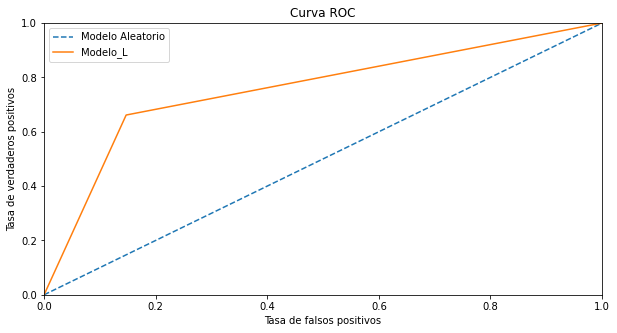

In [18]:
fpr, tpr, thresholds = roc_curve(valid_target_OHE, probabilities_one_valid_L)

plt.figure(figsize=(10, 5))

# Curva ROC para modelo aleatorio
plt.plot([0, 1], [0, 1], linestyle='--', label='Modelo Aleatorio')

# Curva ROC para el modelo
plt.plot(fpr, tpr, label='Modelo_L')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Conclusión:

Como podemos ver en la prueba final, los valores obtenidos para el F1 cumplieron con el objetivo de ejercicio, que fue de llegarlo al 0.59.
Esto quiere decir que hay un equilibrio entre recall y precisión y el modelo tiene muy buenas oportunidades de poder identificar los negativos y positivos.
El uso del sobremuestreo fue decisión personal ya que creo que un modelo se encuentra mejor entrenado cuando tiene mas datos, en vez de quitarle. Mientras mas información, mas material para trabajar. 
La ausencia de positivos hizo mas interesante el ejercicio y aunque no tenemos un valor F1 tan alto como en otros modelos, podemos decir con seguridad de que se esta acercando más el objetivo de pronosticar los clientes que estan a punto de salir del sistema en definitiva. 

Ahora, en la curva ROC, podemos ver que el valor que tenemos de 0.76 nos muestra un estado donde se identifican mas verdaderos positivos con una mínima preocupación de obtener un falso positivo. 

El objetivo del ejercicio cumplió con su objetivo y en el camino vimos que el método mas apropiado para resolverlo fue con árbol de decisiones. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo en este proyecto! 🎉 **Has cumplido con todos los requisitos para la aprobación.**<br>
Tu destreza en la ejecución y presentación de este análisis es notable.<br>
<br>Es un honor destacar tu esfuerzo y el profundo nivel de análisis que has aplicado aquí. Sigue esforzándote y alcanzando nuevas alturas en tus próximos proyectos. Estoy seguro de que este conocimiento te servirá bien y te impulsará hacia retos aún mayores en el futuro.
</div>
